## CLASSIFICATION WITHout MIDTERM SCORES

## Data loading and set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns 
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import make_moons
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
#initiate path and load data
path_to_data = "/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project_-portugese-secondary-student-performance/data/student"
mat = pd.read_csv(path_to_data+'/student-mat.csv', sep=";")
por = pd.read_csv(path_to_data+'/student-por.csv', sep=";")

In [3]:
# merge datasets
df = pd.concat([mat,por])

In [4]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'reason', 'guardian', 'commute_time', 'study_time', 'failures',
       'school_support', 'family_support', 'paid_classes', 'activities',
       'nursery', 'desire_higher_edu', 'internet', 'romantic',
       'family_quality', 'free_time', 'go_out', 'weekday_alcohol_usage',
       'weekend_alcohol_usage', 'health', 'absences', 'period1_score',
       'period2_score', 'final_score'],
      dtype='object')


In [5]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['pass_fail'] = 'na'
df.loc[(df.final_score >= 10), 'pass_fail'] = 'pass' 
df.loc[(df.final_score < 10), 'pass_fail'] = 'fail' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,pass


# Data Preprocessing

In [6]:
df_class = df.drop(['final_score'], axis = 1)
df_class_no = df_class.drop(columns=['period1_score', 'period2_score'])
df_class_no.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,internet,romantic,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,pass


In [7]:
# Separate feature matrix and target variable
y_class_no = df_class_no['pass_fail'] #predict pas/fail status so make pass_fail the target variable
X_class_no = df_class_no.loc[:, df_class_no.columns != 'pass_fail'] 
#print("target variable:",y_reg_no)
#print("feature matrix:", X_reg_no.head())

In [8]:
#check balances
classes, counts = np.unique(y_class_no,return_counts=True)
print('balance:',np.max(counts/len(y_class_no)))
ftr_names= X_class_no.columns

balance: 0.7796934865900383


In [10]:
## Split data using Basic Split
random_state = 42

# first split to separate out the training set
X_class_no_train, X_class_no_other, y_class_no_train, y_class_no_other = train_test_split(X_class_no,y_class_no,train_size = 0.6,random_state=random_state)
#print('training set:',X_class_no_train.shape, X_class_no_train.head(3), y_class_no_train.shape, y_class_no_train.head(3)) 
#print(X_class_no_other.shape, y_class_no_other.shape) 

# second split to separate out the validation and test sets
X_class_no_val, X_class_no_test, y_class_no_val, y_class_no_test = train_test_split(X_class_no_other,y_class_no_other,train_size = 0.5,random_state=random_state)
#print('validation set:',X_class_no_val.shape, X_class_no_val.head(3),y_class_no_val.shape, y_class_no_val.head(3)) 
#print('test set:', X_class_no_test.shape, X_class_no_test.head(3), y_class_no_test.shape, y_class_no_test.head(3)) 

In [11]:
# collect which encoder to use on each feature
# needs to be done manually
onehot_ftrs = ['school','sex','age','address','family_size','parents_status', 
               'mother_job','father_job','reason','guardian','school_support',
               'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic']
minmax_ftrs = ['age','absences']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_class_no_train_prep = clf.fit_transform(X_class_no_train)
X_class_no_val_prep = clf.transform(X_class_no_val)
X_class_no_test_prep = clf.transform(X_class_no_test)

print(X_class_no_train.shape)
print(X_class_no_train_prep.shape)

#apply label encoder to target variable 
le = LabelEncoder()
y_class_no_train_prep = le.fit_transform(y_class_no_train)
#print('Target variable for classifcation training prep set:', y_class_no_train.shape, y_class_no_train.head(3)) 
y_class_no_val_prep = le.transform(y_class_no_val)
#print('Target variable for classifcation validation prep set:', y_class_no_val.shape, y_class_no_val.head(3)) 
y_class_no_test_prep = le.transform(y_class_no_test)
#print('Target variable for classifcation validation prep set:', y_class_no_test.shape, y_class_no_test.head(3)) 

(626, 30)
(626, 53)


# Hyperparameter Tuning/ Cross-validation

## Baseline accuracy

In [12]:
df_class['pass_fail'].describe()

count     1044
unique       2
top       pass
freq       814
Name: pass_fail, dtype: object

In [13]:
814/len(df_class['pass_fail'])

0.7796934865900383

## Function

In [17]:
mean_test_scores = []
std_test_scores = []
def MLpipe_KFold_Acc(X,y,preprocessor,ML_algo,param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.
    '''
    test_scores = np.zeros(10)
    best_models = []
    
    
    # loop through 10 random states (2 points)
    for i in range(1,10):
    
        # split data to other/test 80/20, and the use KFold with 4 folds (2 points)
        # first split to separate out the test set
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)
        #print(X_other.shape,y_other.shape)
        #print('test set:',X_test.shape,y_test.shape)
        
        #label encoder
        le = LabelEncoder()
        y_other_prep = le.fit_transform(y_other)
        y_test_prep = le.transform(y_test)

        # do KFold split on other
        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)

        # preprocess the data (1 point)
        pipe = make_pipeline(preprocessor,ML_algo)
        
        # loop through the hyperparameter combinations or use GridSearchCV (2 points)
        ##create grid search CV with the pipeline, parameter grid, and scoring metric
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score, greater_is_better=True),
                        cv=kf, return_train_score = True, n_jobs = -1)

        # for each combination, calculate the train and validation scores using the evaluation metric
        grid.fit(X_other, y_other_prep)
        
        #save results to a datafrmae
        #results = pd.DataFrame(grid.cv_results_)
        #print(results[['params', 'mean_test_score', 'mean_train_score']])

        # find which hyperparameter combination gives the best validation score (1 point)
        print("best model parameters:", grid.best_params_)
        print('validation score:',grid.best_score_)

        # calculate the best model
        best_models.append(grid)
        
        # calculate and save the test score
        y_test_pred = best_models[-1].predict(X_test)
        test_scores[i] = accuracy_score(y_test_prep,y_test_pred)
        print('test score:', test_scores[i])
        
    return best_models, test_scores

overfit is high train and low test, will do well on training
underfit is low train and test score


## Apply on models

check the baseline, maximum, the proportion of the most popular class

**Comments**
Best model is elastic net alpha = 0.1 and l1_ratio = 0.1, test score = 51.44

In [18]:
#1. RF Classifier
#ML ago
ML_algo = RandomForestClassifier()
#encoders and preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
#parameters
param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.5,0.75,1.0]# linearly spaced between 0.5 and 1
              }
#calculation
models, scores = MLpipe_KFold_Acc(X_class_no,y_class_no,preprocessor,ML_algo,param_grid)
print(scores)


#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)

best model parameters: {'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.5}
validation score: 0.796460940375414
test score: 0.7129186602870813
best model parameters: {'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.5}
validation score: 0.7880532296650717
test score: 0.7464114832535885
best model parameters: {'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.5}
validation score: 0.794011087596614
test score: 0.722488038277512
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.7676722948104527
test score: 0.7894736842105263
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.5}
validation score: 0.7892321494295178
test score: 0.7703349282296651
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.75}
validat

**Comments**
Best model is random forest regressor 
best model parameters: {'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.5}
validation score: 0.5700278340080972
test score: 0.6363636363636364

In [19]:
 #'poly', 'sigmoid' #'tol':[1e-3, 1e-4, 1e-5, 1e-6] # 'svc__kernel': ['rbf','linear']

In [ ]:
#2. SVC
from sklearn.svm import SVC

#ML ago
ML_algo = SVC()
#encoders and preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
#parameters
param_grid = {'svc__C': np.logspace(-2,4,num=10),'svc__gamma': np.logspace(-2,4,num=10)}
             
#calculation
models, scores = MLpipe_KFold_Acc(X_class_no,y_class_no,preprocessor,ML_algo,param_grid)
print(scores)


#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)


best model parameters: {'svc__C': 4.6415888336127775, 'svc__gamma': 0.046415888336127774}
validation score: 0.7976283584836217
test score: 0.7081339712918661
best model parameters: {'svc__C': 0.01, 'svc__gamma': 0.01}
validation score: 0.7880532296650717
test score: 0.7464114832535885
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.21544346900318834}
validation score: 0.7999861980125138
test score: 0.7368421052631579
best model parameters: {'svc__C': 0.01, 'svc__gamma': 0.01}
validation score: 0.7676952981229297
test score: 0.8277511961722488
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.21544346900318834}
validation score: 0.7916187430990063
test score: 0.7655502392344498
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.21544346900318834}
validation score: 0.7916474972396024
test score: 0.7511961722488039


**Comments**
Best model is SVC
test score: 0.5980861244019139
best model parameters: {'svc__C': 4.6415888336127775, 'svc__gamma': 2154.4346900318824}
validation score: 0.5880049227088702
test score: 0.6411483253588517

In [ ]:
#3. KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#ML ago
ML_algo = KNeighborsClassifier()
#encoders and preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
#parameters
param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1,50,4), 'kneighborsclassifier__weights': ['uniform', 'distance']}
#calculation
models, scores = MLpipe_KFold_Acc(X_class_no,y_class_no,preprocessor,ML_algo,param_grid)
print(scores)

#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)

**Comments**
Best model is KNN:
best model parameters: {'kneighborsclassifier__n_neighbors': 45, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.5724546834744203
test score: 0.6267942583732058

In [16]:
#4.logreg
from sklearn.linear_model import LogisticRegression
#ML ago
ML_algo = LogisticRegression()
#encoders and preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
#parameters
param_grid = {"logisticregression__C":np.logspace(-2,2, num=8), "logisticregression__penalty":["l1","l2"]}
#calculation
models, scores = MLpipe_KFold_Acc(X_class_no,y_class_no,preprocessor,ML_algo,param_grid)
print(scores)

#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)

best model parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
validation score: 0.796460940375414
test score: 0.7129186602870813
best model parameters: {'logisticregression__C': 0.0372759372031494, 'logisticregression__penalty': 'l2'}
validation score: 0.7892551527419949
test score: 0.7464114832535885
best model parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
validation score: 0.794011087596614
test score: 0.722488038277512
best model parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
validation score: 0.7676952981229297
test score: 0.8277511961722488


/Users/anniephan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


best model parameters: {'logisticregression__C': 26.826957952797247, 'logisticregression__penalty': 'l2'}
validation score: 0.7844589620905411
test score: 0.7751196172248804
best model parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
validation score: 0.7844647129186603
test score: 0.7607655502392344
best model parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
validation score: 0.7677067997791682
test score: 0.8277511961722488
best model parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
validation score: 0.7868398049319103
test score: 0.7511961722488039
best model parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
validation score: 0.7688454637467794
test score: 0.8229665071770335
[0.         0.71291866 0.74641148 0.72248804 0.8277512  0.77511962
 0.76076555 0.8277512  0.75119617 0.82296651]
mean test score: [0.6947368421052632, 0.6947368421052632]
standard deviat

best Logsitic Regression model is 
best model parameters: {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2'}
validation score: 0.796460940375414
test score: 0.7129186602870813

In [20]:
ML_models = ['RF Classifier', 'SVC', 'KNN-Classification', 'Logistic Regression']

Text(0, 0.5, " mean and standard deviation of each algo's best models")

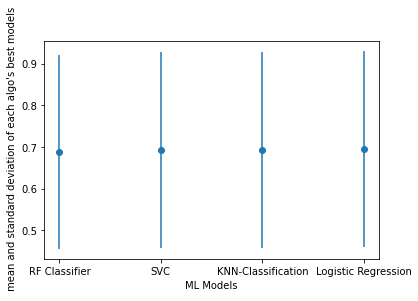

In [21]:
plt.errorbar(ML_models ,mean_test_scores, yerr = std_test_scores, fmt="o")
plt.xlabel("ML Models")
plt.ylabel(" mean and standard deviation of each algo's best models")

Logistic regression

do analysis such as confusion matrix, feature importance is just a way to analyze model to see which features your model values the most, which contributes the mos tto prediction

# Confusion Matrix

In [59]:
import numpy as np
y_true = y_class_no_test_prep
logreg = LogisticRegression(penalty='l2', C = 0.001)
logreg.fit(X_class_no_train_prep, y_class_no_train_prep)
pred_prob_class1 = logreg.predict_proba(X_class_no_test_prep)[:, 1]
p_crit =  0.5

# If predicted probability is < p_crit (by default 0.5), predicted class is 0, otherwise it is 1.
y_pred = np.zeros(len(pred_prob_class1),dtype=int)
y_pred[pred_prob_class1 < p_crit] = 0
y_pred[pred_prob_class1 >= p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels
print(confusion_matrix(y_true,y_pred))

[0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[  0  47]
 [  0 162]]


In [60]:
# visualize the confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

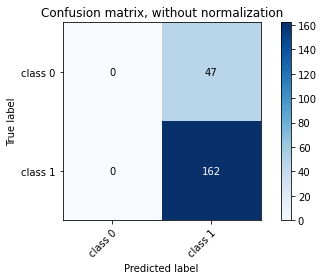

In [61]:
plot_confusion_matrix(y_true,y_pred,classes=['class 0','class 1'])
plt.show()

# Feature selection

# Feature importance